# **Linear Regression and Gradient Descent**

## Task 1

Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$

As we know, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$

Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$.

What $\hat{y}$ value will this model predict for the given observation?

In [1]:
import numpy as np

# Coefficients of the linear model
beta_hat = np.array([1, 2, 1])

# Given observation
x = np.array([4, 2, 1])

# Compute the predicted value y_hat
y_hat = np.dot(beta_hat, x)
print("Predicted Value:", y_hat)


Predicted Value: 9


## Task 1.1

Suppose the correct $y$ was 6.1. 

What will be the L2 loss for our prediction $\hat{y}$ from Task 1?

In [2]:
y_true = 6.1
l2_loss = (y_hat - y_true)**2
print("L2 Loss:", l2_loss)

L2 Loss: 8.410000000000002


## Task 2

The following function generates the dataset you need for the rest of the questions

In [3]:
import numpy as np
import pandas as pd
# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [4]:
# Example:
data = generate_dataset(gamma=10)
data

,X,Y
0,0.991129,7.488178
1,0.683790,5.295055
2,0.037238,-3.763590
3,0.786400,5.729549
4,0.291421,1.816183
...,...,...
95,0.274804,0.491042
96,0.033253,-2.789549
97,0.608884,1.758791
98,0.919499,6.033066


## Task 2.1

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$.

In [5]:
x=data['X']
y_obs=data['Y']

def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)

def mse_loss_derivative(gamma):
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [6]:
n = 100
initial_guess = 0.1
alpha = 0.01

values = gradient_descent(mse_loss_derivative, initial_guess, alpha, n)
best_gamma = values[-1]
print("Best Gamma Value:", best_gamma)


Best Gamma Value: 3.4809376933788396


## Task 2.2

Create a plot below showing the fitted simple linear regression model on the observed data for when we picked the gamma selected by the above algorithm. Our plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

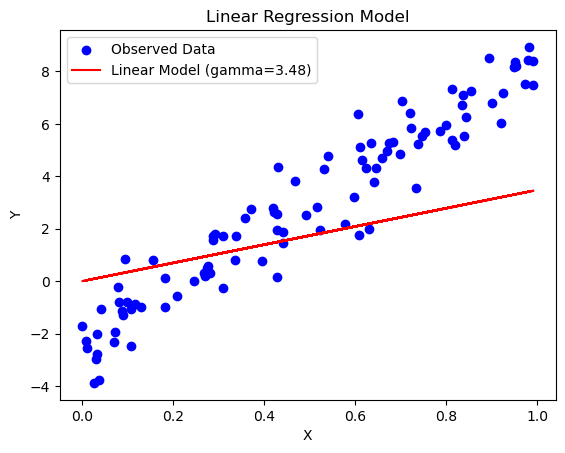

In [7]:
import matplotlib.pyplot as plt

y_pred = x * best_gamma
plt.scatter(x, y_obs, color='blue', label='Observed Data')
plt.plot(x, y_pred, color='red', label='Linear Model (gamma={:.2f})'.format(best_gamma))

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Task 2.3

Use a different value of $\alpha=0.1$ and repeat Tasks 2.1 and 2.2


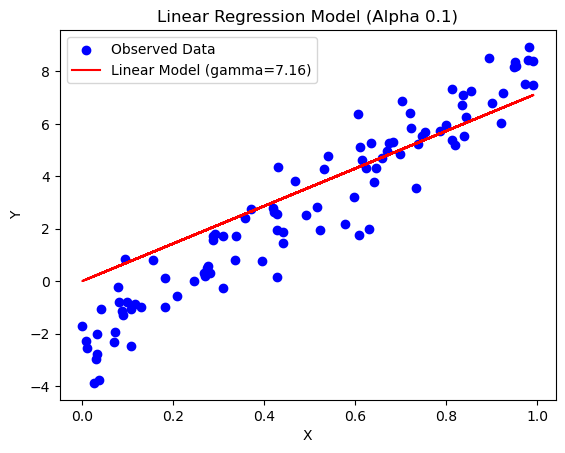

New Best Gamma Value: 7.162090677855303


In [8]:
new_alpha = 0.1
new_values = gradient_descent(mse_loss_derivative, initial_guess, new_alpha, n)
new_best_gamma = new_values[-1]

new_y_pred = x * new_best_gamma
plt.scatter(x, y_obs, color='blue', label='Observed Data')
plt.plot(x, new_y_pred, color='red', label='Linear Model (gamma={:.2f})'.format(new_best_gamma))

plt.title('Linear Regression Model (Alpha 0.1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("New Best Gamma Value:", new_best_gamma)

## Task 2.4

A lower MSE value of $\alpha$ results in a better model and indicates a better fit to the data. Therefore, Model 2 is the better model.

This is because the higher learning rate allowed our model to converge faster to an optimal gamma value.

In [9]:
mse_model1 = mse_loss(best_gamma)
mse_model2 = mse_loss(new_best_gamma)
print("MSE for Model #1:", mse_model1)
print("MSE for Model #2:", mse_model2)

MSE for Model #1: 6.87834175742671
MSE for Model #2: 2.4208521875107243


## Task 2.5

What other inputs of the gradient_descent function can we change to imporove the model?
- Initial Guess: Can lead to faster convergence.
- Number of Iterations: Gives model more time for convergence.
- Learning Rate: Can significantly impact the performance of the model.
- Regularization: Can prevent overfitting.
- Batch Size for Gradient: Using mini-batch or stochastic can lead to faster convergence.

## Task 3

## Task 3.1
Write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for our model based on whether or not an intercept term is specified within the model itself.

Hint: Use sklearn.linear_model.LinearRegression library

In [10]:
from sklearn.linear_model import LinearRegression

def calculate_y_hat(X, Y, with_intercept):
    if X.ndim == 1:
        X = np.array(X).reshape(-1, 1)
    if Y.ndim == 1:
        Y = np.array(Y).reshape(-1, 1)
    model_y_hat = LinearRegression(fit_intercept=with_intercept)
    model_y_hat.fit(X, Y)
    y_hat1 = model_y_hat.predict(X)
    return y_hat1

## Task 3.2

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. The plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

Different colors should be used for the two line plots.

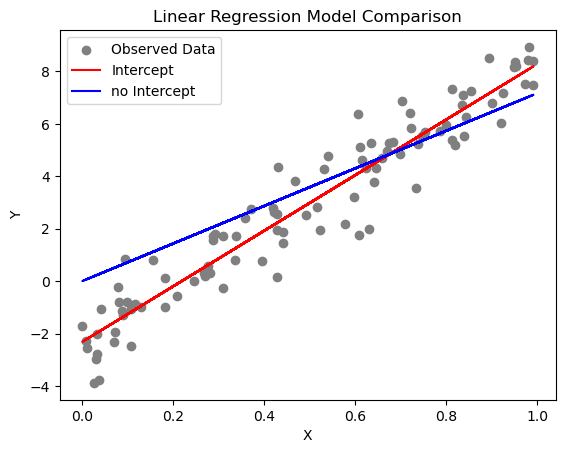

In [11]:
y_hat_with_intercept = calculate_y_hat(x, y_obs, True)
y_hat_without_intercept = calculate_y_hat(x, y_obs, False)

plt.scatter(x, y_obs, color='gray', label='Observed Data')
plt.plot(x, y_hat_with_intercept, color='red', label='Intercept')
plt.plot(x, y_hat_without_intercept, color='blue', label='no Intercept')

plt.title('Linear Regression Model Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()